# LIBRARIES TO USE

In [1]:
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.utils import to_categorical

# IMPORT DATA

In [2]:
my_data_pandas = pd.read_csv('train_labels.csv', delimiter=',')

In [3]:
my_data_pandas.head()

,image,target
0,tfymlmdkpzkqdjhdxyhnoeuqszxphw.jpg,0
1,rxgismgsvmaayzjarbfjaljhqmpbrt.jpg,1
2,uuzshfrhkgrkolhwdvliqauzulurnz.jpg,0
3,mjspxsagzusaznvnyxgamtrlqkqklp.jpg,0
4,rlbmuajgezfiddjzlyeoupxpqubkpt.jpg,1


In [4]:
images = []
target = []
def import_image(data):
    ID = data['image']
    for i in range(0,len(data)):
        char = './images/'+str(ID[i])
        photo_data = cv2.imread(char)
        curImg = cv2.resize(photo_data,(100,100))
        images.append(curImg)
def import_labels(data):
    labels = data['target']
    for i in range(0,len(data)):
        x = labels[i]
        target.append(x)

In [5]:
import_image(my_data_pandas)
import_labels(my_data_pandas)

# EXPLORING THE DATA

In [6]:
print("Total Images in Images List = ",len(images))
print("Total target in target List= ",len(target))

Total Images in Images List =  1308
Total target in target List=  1308


# CONVERTING TO NUMPY ARRAY

In [7]:
images = np.array(images)
target = np.array(target)

In [8]:
index = 0
images[index].shape

(100, 100, 3)

In [9]:
images[index]

array([[[ 70,  80,  12],
        [ 94, 101,   9],
        [ 97, 110,   6],
        ...,
        [ 50,  84, 127],
        [  0,  78, 137],
        [  7,  83, 149]],

       [[ 76,  87,  11],
        [ 95, 103,   3],
        [ 99, 113,   1],
        ...,
        [ 53,  87, 130],
        [  1,  81, 140],
        [  8,  86, 152]],

       [[ 76,  85,   7],
        [103, 108,   6],
        [104, 117,   3],
        ...,
        [ 53,  87, 130],
        [  2,  82, 141],
        [  9,  89, 154]],

       ...,

       [[ 82,  84,  96],
        [147, 130, 128],
        [ 29,  76, 124],
        ...,
        [248, 239, 225],
        [243, 234, 220],
        [247, 237, 219]],

       [[ 74,  77,  89],
        [158, 142, 137],
        [ 28,  75, 118],
        ...,
        [246, 237, 223],
        [249, 240, 226],
        [250, 240, 222]],

       [[ 64,  70,  84],
        [163, 147, 139],
        [ 31,  76, 114],
        ...,
        [252, 243, 229],
        [250, 241, 227],
        [249, 239, 221]]

In [10]:
target

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

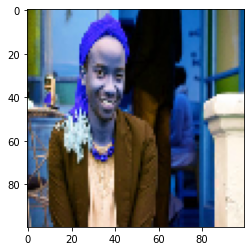

In [11]:
plt.imshow(images[index])

# TRAIN TEST DATA

In [12]:
x_train,x_test,y_train,y_test = train_test_split(images,target,test_size=0.2)

In [13]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (1046, 100, 100, 3)
y_train shape: (1046,)
x_test shape: (262, 100, 100, 3)
y_test shape: (262,)


# Normalize the pixels (0 and 1)

In [14]:
x_train = x_train / 255
x_test = x_test / 255

In [15]:
x_train[0]

array([[[0.07843137, 0.14901961, 0.2627451 ],
        [0.0627451 , 0.12156863, 0.21568627],
        [0.0745098 , 0.1254902 , 0.19607843],
        ...,
        [0.34901961, 0.41568627, 0.45098039],
        [0.34901961, 0.41568627, 0.45098039],
        [0.34901961, 0.40784314, 0.44313725]],

       [[0.08627451, 0.14901961, 0.25882353],
        [0.0627451 , 0.12156863, 0.21176471],
        [0.07058824, 0.1254902 , 0.19607843],
        ...,
        [0.34901961, 0.41568627, 0.45098039],
        [0.34901961, 0.41568627, 0.45098039],
        [0.35294118, 0.41176471, 0.44705882]],

       [[0.09411765, 0.15294118, 0.25098039],
        [0.06666667, 0.12156863, 0.21176471],
        [0.06666667, 0.1254902 , 0.2       ],
        ...,
        [0.34901961, 0.41568627, 0.45098039],
        [0.34901961, 0.41568627, 0.45098039],
        [0.35686275, 0.41568627, 0.45098039]],

       ...,

       [[0.45882353, 0.47843137, 0.57647059],
        [0.45490196, 0.4745098 , 0.57254902],
        [0.45098039, 0

# Build The Convolution Neural Network Model


In [16]:
def myModel():
    model = Sequential() # create the architecture
    model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(100,100,3))) # extract features from the input image
    model.add(MaxPooling2D(pool_size=(2, 2))) #reduces the dimension of the features maps by half 
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  #reduce the image to a linear array
    model.add(Dense(1000, activation='relu'))  #create a neural network where the first layer has 1000 neurons and the activation function ReLu.
    model.add(Dropout(0.5))
    model.add(Dense(750, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) #Create the last layer of this neural network with 1 neurons (one for each label) 
    model.compile(optimizer='adam' ,loss='binary_crossentropy',metrics=['accuracy']) #binary_cross (0,1) class , categorical(0,..)
    return model

In [17]:
model = myModel()

# FIT THE MODEL

In [18]:
hist = model.fit(x_train, y_train,validation_split=0.2  , epochs=10 ) 

Epoch 1/10
27/27 [==============================] - 19s 683ms/step - loss: 0.9324 - accuracy: 0.5123 - val_loss: 0.6947 - val_accuracy: 0.5095
Epoch 2/10
27/27 [==============================] - 18s 660ms/step - loss: 0.6962 - accuracy: 0.5108 - val_loss: 0.6932 - val_accuracy: 0.4857
Epoch 3/10
27/27 [==============================] - 18s 673ms/step - loss: 0.6926 - accuracy: 0.5017 - val_loss: 0.6928 - val_accuracy: 0.5095
Epoch 4/10
27/27 [==============================] - 18s 668ms/step - loss: 0.6937 - accuracy: 0.5353 - val_loss: 0.6928 - val_accuracy: 0.5095
Epoch 5/10
27/27 [==============================] - 19s 688ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6918 - val_accuracy: 0.5810
Epoch 6/10
27/27 [==============================] - 20s 755ms/step - loss: 0.6945 - accuracy: 0.4819 - val_loss: 0.6927 - val_accuracy: 0.5190
Epoch 7/10
27/27 [==============================] - 19s 710ms/step - loss: 0.6890 - accuracy: 0.5440 - val_loss: 0.6881 - val_accuracy: 0.5476

#  Visualize the models accuracy 

In [23]:
model.evaluate(x_test,y_test)

9/9 [==============================] - 1s 92ms/step - loss: 0.6786 - accuracy: 0.6069


[0.6785549521446228, 0.6068702340126038]

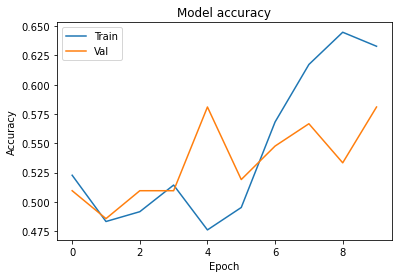

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## IMPORT A NEW IMAGE

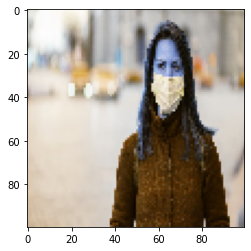

In [31]:
new_image = cv2.imread('image3.jpg')
resized = cv2.resize(new_image,(100,100))
plt.imshow(resized)

In [32]:
predictions = model.predict(np.array( [resized] ))

In [33]:
print('probability that the person in the image wearing a mask is : ', predictions)

probability that the person in the image wearing a mask is :  [[1.]]
